## Imports

In [1]:
import matplotlib.pyplot as plt
import seaborn
import numpy as np
%matplotlib inline

from scipy import stats

### How about some legible text in our graph?

In [2]:
import matplotlib as mpl
mpl.rcParams.update({
    'font.size'           : 20.0,
    'axes.titlesize'      : 'large',
    'axes.labelsize'      : 'medium',
    'xtick.labelsize'     : 'medium',
    'ytick.labelsize'     : 'medium',
    'legend.fontsize'     : 'large',
})

### Calculate moment of interest for Poisson distribution

In [3]:
sample = [6, 4, 7, 4, 9, 3, 5]
mu = sum(sample)/len(sample)
print("The mean (and variance) of the poisson distribution is {0:0.2f}.".format(mu))

The mean (and variance) of the poisson distribution is 5.43.


### Discrete x values that cover most of the poisson cdf using the percentile point function

In [4]:
x = np.arange(stats.poisson.ppf(0.001, mu),
              stats.poisson.ppf(0.999, mu))
print(x)

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.]


### With lambda and x can compute probabilities using the pmf

In [5]:
print("The probability of one visitor is {0:0.3f}.".format(stats.poisson.pmf(1, mu)))
print("The probability of six visitors is {0:0.3f}.".format(stats.poisson.pmf(6, mu)))

The probability of one visitor is 0.024.
The probability of six visitors is 0.156.


### Plot the distribution

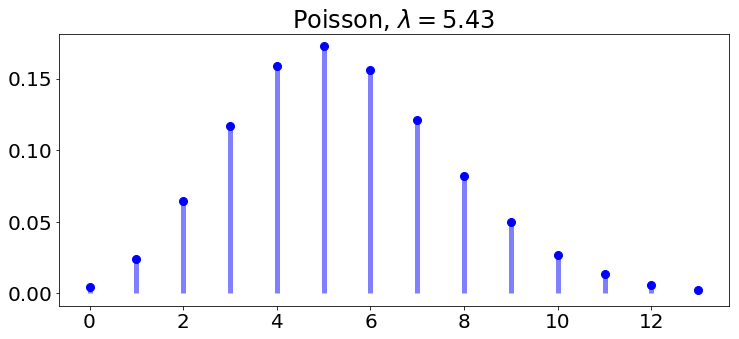

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
ax.plot(x, stats.poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, stats.poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)
ax.set_title("Poisson, $\lambda={:.2f}$".format(mu));   # why the ;?

In [7]:
prob_0_visitors = stats.poisson.pmf(0, mu)
print("The probability of zero visitors is {0:0.3f}.".format(prob_0_visitors))

The probability of zero visitors is 0.004.


#### Question 1: What's the probability of there being 4 to 6 visitors? 

In [8]:
prob_4_visitors = stats.poisson.pmf(4, mu)
prob_5_visitors = stats.poisson.pmf(5, mu)
prob_6_visitors = stats.poisson.pmf(6, mu)
print("The probability of four to 6 visitors is {0:0.3f}.".format(prob_4_visitors+prob_5_visitors+prob_6_visitors))

The probability of four to 6 visitors is 0.487.


#### Question 2:  What's the probability of there being up to 7 visitors?

In [11]:
prob_up_7visitors = stats.poisson.pmf(np.array([[0,1,2,3,4,5,6,7]]), mu).sum()
print(prob_up_7visitors)

0.818216036271


In [12]:
prob_up_7visitors = stats.poisson.cdf(7, mu)
print(prob_up_7visitors)

0.818216036271


In [19]:
#flip a coin 100 times
#comes up heads 52 times
#MoM estimate that in the next 100 flips the coin will be heads <=45 times

n=100
p=.52
rv = stats.binom(n, p)
print(rv.cdf(45))



0.0966533503278
